In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("../Project 4 files_Aamir/short_df.csv")
# Show the first few rows to understand the data
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,cleaned_text
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,food fastgrowing james beard awardwinning onli...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,organised focused vibrant awesomedo passion cu...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,client located houston actively seeking experi...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,company esri environmental system research ins...
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,job title itemization review managerlocation f...


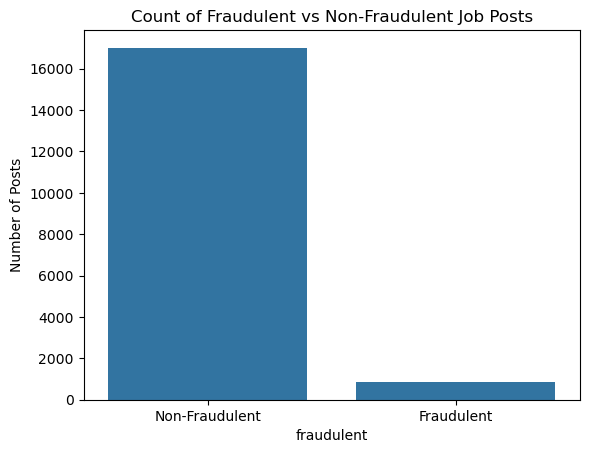

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='fraudulent', data=df)
plt.title("Count of Fraudulent vs Non-Fraudulent Job Posts")
plt.xticks([0,1], ['Non-Fraudulent', 'Fraudulent'])
plt.ylabel("Number of Posts")
plt.show()


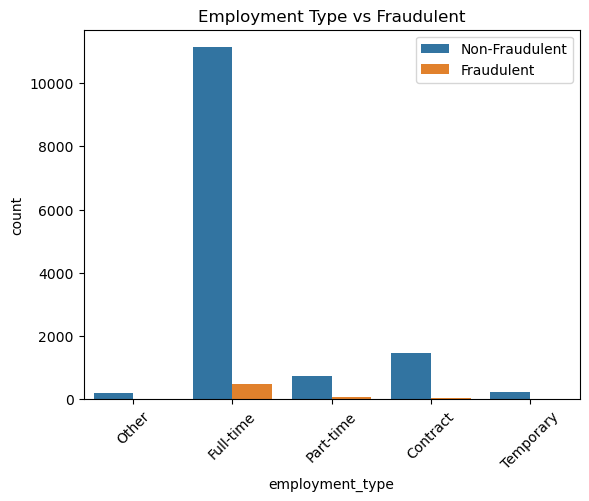

In [4]:
# Fraud rate by employment type
sns.countplot(x='employment_type', hue='fraudulent', data=df)
plt.title("Employment Type vs Fraudulent")
plt.xticks(rotation=45)
plt.legend(labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


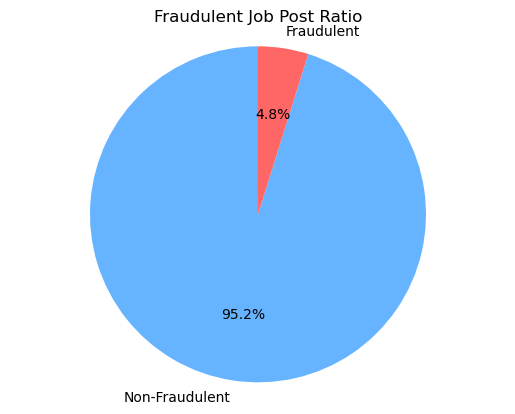

In [5]:
fraud_counts = df['fraudulent'].value_counts()
labels = ['Non-Fraudulent', 'Fraudulent']

plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff6666'])
plt.title('Fraudulent Job Post Ratio')
plt.axis('equal')
plt.show()


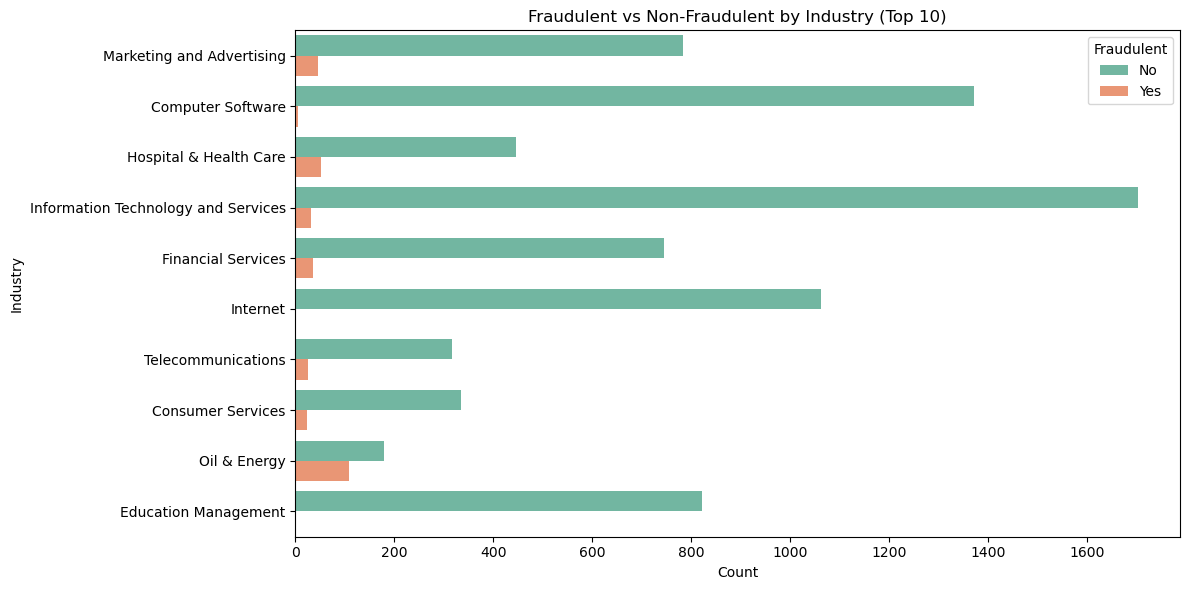

In [6]:
# Filter only top 10 industries
top_industries = df["industry"].value_counts().nlargest(10).index
df_top = df[df["industry"].isin(top_industries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, y="industry", hue="fraudulent", palette="Set2")

plt.title("Fraudulent vs Non-Fraudulent by Industry (Top 10)")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.legend(title="Fraudulent", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


C:\Users\quaid\AppData\Local\Temp\ipykernel_26400\2469066593.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fraud, y="word", x="score", palette="Reds_r", ax=axs[0])
C:\Users\quaid\AppData\Local\Temp\ipykernel_26400\2469066593.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_nonfraud, y="word", x="score", palette="Greens_r", ax=axs[1])


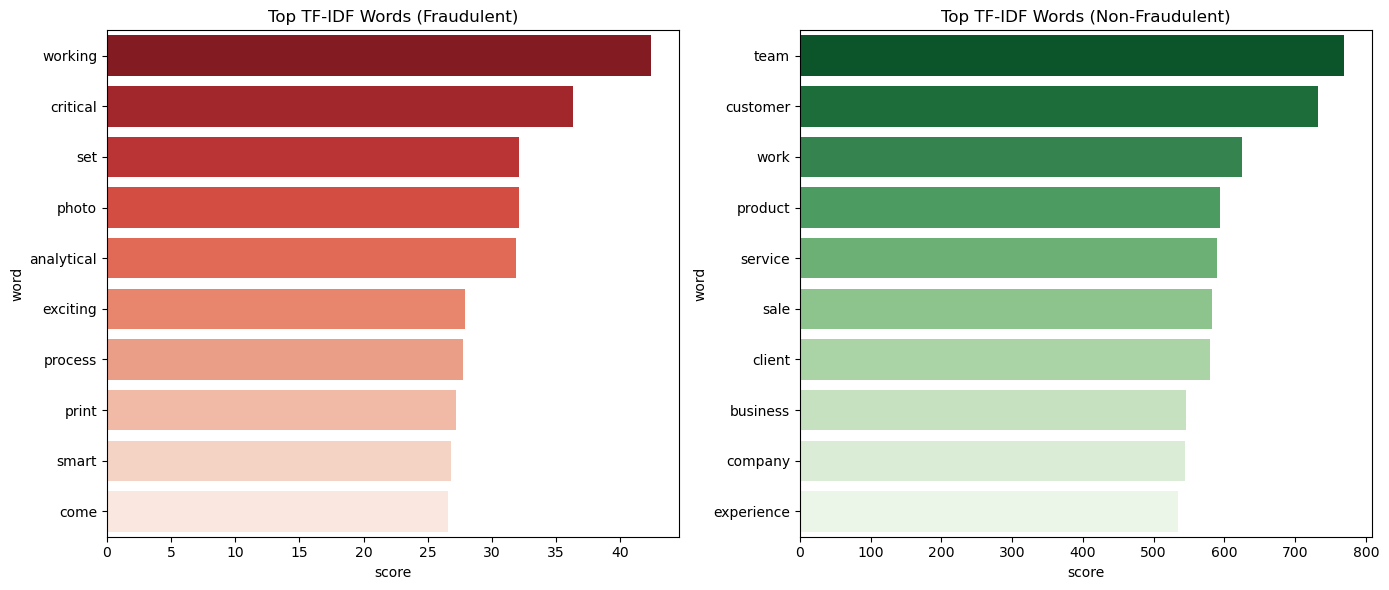

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load data
df = pd.read_csv("short_df.csv")

# Drop rows with missing cleaned_text
df = df.dropna(subset=["cleaned_text"])

# Separate text based on class
fraud_texts = df[df["fraudulent"] == 1]["cleaned_text"]
nonfraud_texts = df[df["fraudulent"] == 0]["cleaned_text"]

# Initialize TF-IDF Vectorizer with stopwords removed
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit TF-IDF on each class separately
fraud_tfidf = vectorizer.fit_transform(fraud_texts)
nonfraud_tfidf = vectorizer.fit_transform(nonfraud_texts)

# Get top N features
def get_top_tfidf_words(tfidf_matrix, vectorizer, top_n=10):
    sums = tfidf_matrix.sum(axis=0)
    words_scores = [(word, sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_words = sorted(words_scores, key=lambda x: x[1], reverse=True)[:top_n]
    return pd.DataFrame(sorted_words, columns=["word", "score"])

# Create DataFrames for top words
top_fraud = get_top_tfidf_words(fraud_tfidf, vectorizer)
top_nonfraud = get_top_tfidf_words(nonfraud_tfidf, vectorizer)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=top_fraud, y="word", x="score", palette="Reds_r", ax=axs[0])
axs[0].set_title("Top TF-IDF Words (Fraudulent)")

sns.barplot(data=top_nonfraud, y="word", x="score", palette="Greens_r", ax=axs[1])
axs[1].set_title("Top TF-IDF Words (Non-Fraudulent)")

plt.tight_layout()
plt.show()
